# Project 3: Tidy Data X 3 #

## Initialization Steps: ##

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset 1: Jeeho Bae's  South India Destination Reviews ##

This dataset provides the number of reviews created by each individual users among destinations across South India. The different categories are Sports, Religious, Nature, Theatre, Shopping, Picnic. The question that was asked about this dataset is to find out which among the different destination categories had the highest frequency of reviews from the users.

### Step 1: Reading the .csv file ###

In [15]:
india_df = pd.read_csv('https://raw.githubusercontent.com/doryaswi/DAV-5400/master/SouthIndiaReview.csv')
india_df.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


### Step 2: Tidying/Cleaning Up the Dataset ###
The following steps were undertaken to clean up the dataset:
1. Check if there are any null values for each column in the dataset. If so, decide on how to handle null values. If none, proceed to next step.
2. Change structure of dataset from "wide" to "long" format.
3. Rename new columns variable as "Destination" and value as "Number of Reviews".

In [5]:
#checks if there are any null values for each column
india_df.columns[india_df.isnull().any()]

Index([], dtype='object')

There are no null values found for this dataset so we can proceed with the next step.

In [6]:
#change dataset format from "wide" to "long"
l_india_df = india_df.melt(id_vars='User Id', value_vars=['Sports', 'Religious', 'Nature', 'Theatre','Shopping','Picnic'])
l_india_df.head()

,User Id,variable,value
0,User 1,Sports,2
1,User 2,Sports,2
2,User 3,Sports,2
3,User 4,Sports,2
4,User 5,Sports,2


In [7]:
#rename variable and value columns to "Destination" and "Number of Reviews" respectively
l_india_df.rename(columns={'variable':'Destination', 'value':'Number of Reviews'},inplace=True)
l_india_df.head()

,User Id,Destination,Number of Reviews
0,User 1,Sports,2
1,User 2,Sports,2
2,User 3,Sports,2
3,User 4,Sports,2
4,User 5,Sports,2


### Step 3: Data Analysis ###

**Question:** Which among the different destination categories had the highest frequency of reviews from the users?

To answer the above question, the following steps were done:
1. Group the dataset by destination and then calculate sum of the frequency reviews by destination.
2. Sort sum of the frequency of reviews in descending order.
3. Generate bar plot to visualize result.

In [8]:
grouped_india = l_india_df.groupby(['Destination']).sum()
grouped_india.sort_values(by='Number of Reviews',ascending=False,inplace=True)
grouped_india

,Number of Reviews
Destination,
Nature,31005
Picnic,29980
Theatre,28978
Shopping,28047
Religious,27335
Sports,2985


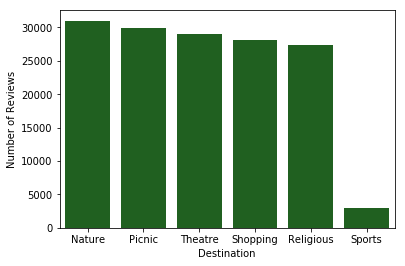

In [9]:
sns.barplot(x=grouped_india.index, y='Number of Reviews', color='green', saturation=0.5, data=grouped_india);

**Analysis:** Based on the results and the bar chart shown above, the destination category "Nature" has the most number of reviews with 31,005 reviews in total from all the users.

## Dataset 2: Qi Sun's  Student Enrollment by Ethnicity Dataset ##

This dataset provides student enrollment data by race for different institution for the academic year of 2016/2017. Furthermore, the dataset is grouped by institution and level of enrollment (undergraduate and graduate). The questions that were asked about this dataset are analyze the enrollment on different ethnicity by level and also to compare enrollment on different ethnicity by institution.

### Step 1: Reading the .csv file ###

In [10]:
enrollment_df = pd.read_csv('https://raw.githubusercontent.com/doryaswi/DAV-5400/master/Student%20Enrollment%20Data.csv')
enrollment_df.head()

,Unique ID of the institution,Level of student,American Indian or Alaska Native,Asian,Black or African American,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,White,Two or more races,Race/ethnicity unknown,Nonresident alien
0,100654,Undergraduate,11,12,4742,36,10,137,210,11,38
1,100654,Graduate,4,11,961,7,1,151,14,3,33
2,100663,Undergraduate,36,743,3497,429,4,7515,522,198,364
3,100663,Graduate,26,471,1550,289,11,6437,269,176,659
4,100690,Undergraduate,0,2,195,44,1,66,0,123,0


### Step 2: Tidying/Cleaning Up the Dataset ###

The following steps were undertaken to clean up this dataset:
1. Make column names as short as possible.
2. Check if there are any null values for each column in the dataset. If so, decide on how to handle null values. If none, proceed to next step.
3. Change structure of dataset from "wide" to "long" format.
4. Rename new columns variable as "Race/Ethnicity" and value as "Number of Enrollees".

In [11]:
#rename columns to shorten them
enrollment_df.columns = ['Institution ID', 'Level', 'Native American', 'Asian', 'African American', 'Hispanic/Latino',
                                'Pacific Islander', 'White', 'Two or more races', 'Race/ethnicity unknown', 'Nonresident alien']
enrollment_df

,Institution ID,Level,Native American,Asian,African American,Hispanic/Latino,Pacific Islander,White,Two or more races,Race/ethnicity unknown,Nonresident alien
0,100654,Undergraduate,11,12,4742,36,10,137,210,11,38
1,100654,Graduate,4,11,961,7,1,151,14,3,33
2,100663,Undergraduate,36,743,3497,429,4,7515,522,198,364
3,100663,Graduate,26,471,1550,289,11,6437,269,176,659
4,100690,Undergraduate,0,2,195,44,1,66,0,123,0
5,100690,Graduate,2,1,152,43,4,93,0,142,0
6,100706,Undergraduate,90,304,813,313,3,5055,129,595,217
7,100706,Graduate,23,71,202,64,0,1518,20,115,365


In [12]:
#checks if there are any null values for each column
enrollment_df.columns[enrollment_df.isnull().any()]

Index([], dtype='object')

There are no null values found for this dataset so we can proceed with the next step.

In [13]:
#change data structure from "wide" to "long" format
l_enroll_df = enrollment_df.melt(id_vars=['Institution ID', 'Level'], value_vars=['Native American', 'Asian', 
                                'African American', 'Hispanic/Latino','Pacific Islander','White','Two or more races',
                                'Race/ethnicity unknown', 'Nonresident alien'])
l_enroll_df.head()

,Institution ID,Level,variable,value
0,100654,Undergraduate,Native American,11
1,100654,Graduate,Native American,4
2,100663,Undergraduate,Native American,36
3,100663,Graduate,Native American,26
4,100690,Undergraduate,Native American,0


In [14]:
#rename columns variable and value as "Race/Ethnicity" and "Number of Enrollees" respectively
l_enroll_df.rename(columns={'variable':'Race/Ethnicity', 'value':'Number of Enrollees'},inplace=True)
l_enroll_df.head()

,Institution ID,Level,Race/Ethnicity,Number of Enrollees
0,100654,Undergraduate,Native American,11
1,100654,Graduate,Native American,4
2,100663,Undergraduate,Native American,36
3,100663,Graduate,Native American,26
4,100690,Undergraduate,Native American,0


### Step 3: Data Analysis ###

**Questions:**
1. Compare enrollment data across all race/ethnicity by level (graduate/undergraduate).
2. Compare enrollment data across all race/ethnicity by institution.

**Question 1: Compare enrollment data across all race/ethnicity by level (graduate/undergraduate)**
To be able to answer this question, the following steps were undertaken:
1. Create dataframe to store total number of enrollees by level (graduate/undergraduate).
2. Create dataframe to store number of enrollees grouped by Level and Race/Ethnicity.
3. Merge two dataframes on "Level" and by using an outer join. Number of Enrollees column suffixes were changed to Number of Enrollees_race_level and Number of Enrollees_total.
4. Created new column for percentage of enrollees by Level and Race/Ethnicity.
5. Created bar chart to visualize the results.

In [16]:
#get total number of enrollees by level
sum_level_df = l_enroll_df.groupby(['Level'],as_index=False)['Number of Enrollees'].sum()
sum_level_df

,Level,Number of Enrollees
0,Graduate,13888
1,Undergraduate,26465


In [17]:
#creates dataframe grouped by Level and Race/Ethnicity
level_race_df = l_enroll_df.groupby(['Level','Race/Ethnicity'],as_index=False)['Number of Enrollees'].sum()
level_race_df

,Level,Race/Ethnicity,Number of Enrollees
0,Graduate,African American,2865
1,Graduate,Asian,554
2,Graduate,Hispanic/Latino,403
3,Graduate,Native American,55
4,Graduate,Nonresident alien,1057
5,Graduate,Pacific Islander,16
6,Graduate,Race/ethnicity unknown,436
7,Graduate,Two or more races,303
8,Graduate,White,8199
9,Undergraduate,African American,9247


In [18]:
#merge the data frames by using outer join
pct_level_race = pd.merge(level_race_df,sum_level_df,on=['Level'],how='outer', suffixes=('_race_level','_total'))
pct_level_race

,Level,Race/Ethnicity,Number of Enrollees_race_level,Number of Enrollees_total
0,Graduate,African American,2865,13888
1,Graduate,Asian,554,13888
2,Graduate,Hispanic/Latino,403,13888
3,Graduate,Native American,55,13888
4,Graduate,Nonresident alien,1057,13888
5,Graduate,Pacific Islander,16,13888
6,Graduate,Race/ethnicity unknown,436,13888
7,Graduate,Two or more races,303,13888
8,Graduate,White,8199,13888
9,Undergraduate,African American,9247,26465


In [19]:
#create new column to store and calculate percentage of enrollees by level and race
pct_level_race['Pct Race by Level'] = (pct_level_race['Number of Enrollees_race_level']/pct_level_race['Number of Enrollees_total']) * 100
pct_level_race

,Level,Race/Ethnicity,Number of Enrollees_race_level,Number of Enrollees_total,Pct Race by Level
0,Graduate,African American,2865,13888,20.629320
1,Graduate,Asian,554,13888,3.989055
2,Graduate,Hispanic/Latino,403,13888,2.901786
3,Graduate,Native American,55,13888,0.396025
4,Graduate,Nonresident alien,1057,13888,7.610887
5,Graduate,Pacific Islander,16,13888,0.115207
6,Graduate,Race/ethnicity unknown,436,13888,3.139401
7,Graduate,Two or more races,303,13888,2.181740
8,Graduate,White,8199,13888,59.036578
9,Undergraduate,African American,9247,26465,34.940487


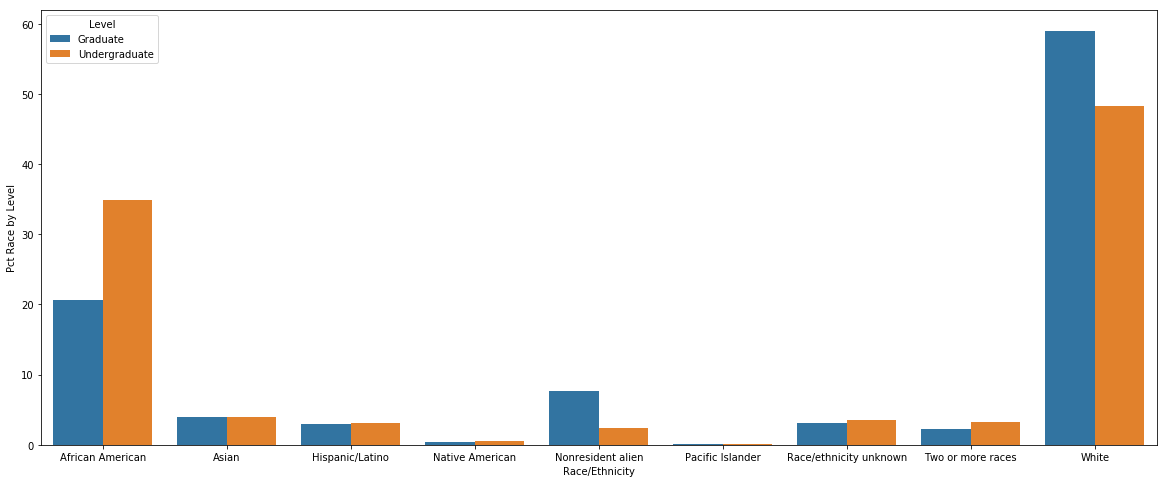

In [20]:
plt.figure(figsize=(20,8))
sns.barplot(x='Race/Ethnicity', y='Pct Race by Level',hue='Level',data=pct_level_race); #creates bar plot by Level and Race/Ethnicity

**Analysis/Insights:**
1. For both levels, the highest percentage of enrollees is for "White".
2. Pacific Islander on the other hand has the lowest percentage of enrollees for both levels.
3. Asian and Hispanic/Latino races/ethnicities have almost the same percentage of enrollees for both levels.
4. The highest percentage of enrollees belong to the "Graduate" level who are "White".

**Question 2: Compare enrollment data across all race/ethnicity by institution**
To be able to answer this question, the following steps were undertaken:
1. Create dataframe to store total number of enrollees by institution.
2. Create dataframe to store number of enrollees grouped by Institution ID and Race/Ethnicity.
3. Merge two dataframes on "Institution ID" and by using an outer join. Number of Enrollees column suffixes were changed to Number of Enrollees_race_institution and Number of Enrollees_total.
4. Created new column for percentage of enrollees by Institution and Race/Ethnicity.
5. Created bar chart to visualize the results.

In [21]:
#create dataframe to store total number of enrollees by institution
sum_institution_df = l_enroll_df.groupby(['Institution ID'],as_index=False)['Number of Enrollees'].sum()
sum_institution_df

,Institution ID,Number of Enrollees
0,100654,6392
1,100663,23196
2,100690,868
3,100706,9897


In [22]:
#create dataframe to store number of enrollees by "Institution ID" and "Race/Ethnicity"
institution_race_df = l_enroll_df.groupby(['Institution ID','Race/Ethnicity'],as_index=False)['Number of Enrollees'].sum()
institution_race_df

,Institution ID,Race/Ethnicity,Number of Enrollees
0,100654,African American,5703
1,100654,Asian,23
2,100654,Hispanic/Latino,43
3,100654,Native American,15
4,100654,Nonresident alien,71
5,100654,Pacific Islander,11
6,100654,Race/ethnicity unknown,14
7,100654,Two or more races,224
8,100654,White,288
9,100663,African American,5047


In [23]:
#merging the two dataframes created above on "Institution ID"
pct_institution_race = pd.merge(institution_race_df,sum_institution_df,on=['Institution ID'],how='outer', suffixes=('_race_institution','_total'))
pct_institution_race

,Institution ID,Race/Ethnicity,Number of Enrollees_race_institution,Number of Enrollees_total
0,100654,African American,5703,6392
1,100654,Asian,23,6392
2,100654,Hispanic/Latino,43,6392
3,100654,Native American,15,6392
4,100654,Nonresident alien,71,6392
5,100654,Pacific Islander,11,6392
6,100654,Race/ethnicity unknown,14,6392
7,100654,Two or more races,224,6392
8,100654,White,288,6392
9,100663,African American,5047,23196


In [24]:
#create new column that calculates the percentage of enrollees by race/ethnicity for each institution
pct_institution_race['Pct Race by Institution'] = (pct_institution_race['Number of Enrollees_race_institution']/pct_institution_race['Number of Enrollees_total']) * 100
pct_institution_race

,Institution ID,Race/Ethnicity,Number of Enrollees_race_institution,Number of Enrollees_total,Pct Race by Institution
0,100654,African American,5703,6392,89.220901
1,100654,Asian,23,6392,0.359825
2,100654,Hispanic/Latino,43,6392,0.672716
3,100654,Native American,15,6392,0.234668
4,100654,Nonresident alien,71,6392,1.110763
5,100654,Pacific Islander,11,6392,0.172090
6,100654,Race/ethnicity unknown,14,6392,0.219024
7,100654,Two or more races,224,6392,3.504380
8,100654,White,288,6392,4.505632
9,100663,African American,5047,23196,21.758062


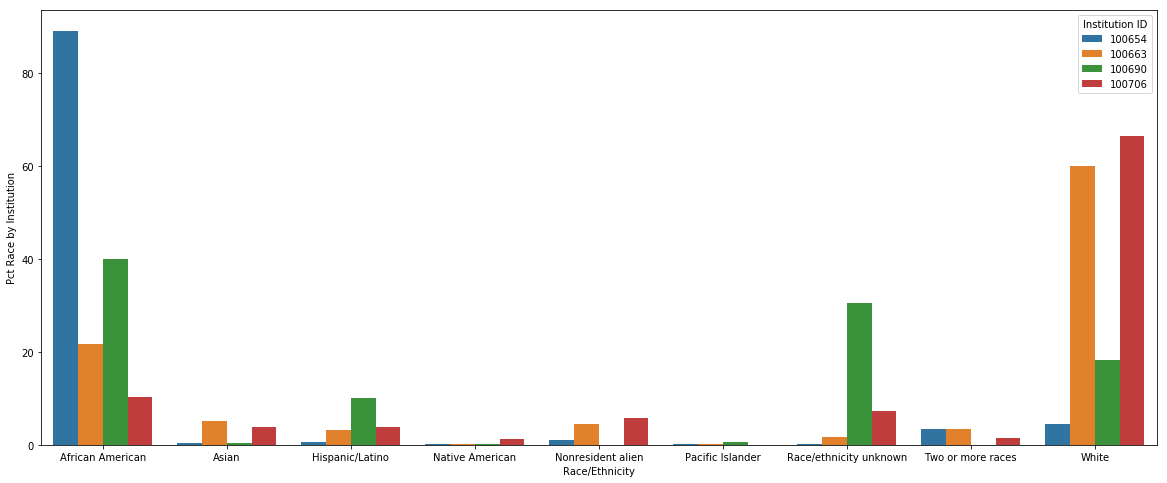

In [25]:
plt.figure(figsize=(20,8))
sns.barplot(x='Race/Ethnicity', y='Pct Race by Institution',hue='Institution ID',data=pct_institution_race); #creates bar plot to visualize results

**Analysis/Insights:**
1. For institution 100654, the top percentage of enrollees by race is African American. Based on the bar chart also, there seems to be a large difference on the percentage for this particular race (African American) as compared to the second highest which is White.
2. Institution 100690 also have African American as the race that have the highest enrollee for academic year 2016/2017, however, the second highest enrollees are the ones who have race/ethnicity unknown. Looking into this data deeper will be very interesting to analyze as for why there are a lot of enrollees who responded in this way.
3. Institutions 100663 and 100706 have "White" as the race having the highest percentage of enrollees and African American as having the second highest percentage of enrollees.

## Dataset 3: My Educational Attainment Dataset ##

The dataset contains information about the highest educational level attained by adults in the different states of the US and is also broken down by county. The columns represents percentage of adults who attained a certain level of education by county and state. The levels of education measured were: less than high school diploma, high school diploma, some college (1-3) years or associate's degree, and four years of college or higher. The data was gathered for the years 1970, 1980, 1990, 2000, and 2013-2017. The questions that were asked for this dataset are:
1. What is the overall trend in the level of education attained by adults in the US from the years mentioned above?
2. Which state has the greatest percentage of adults who have a bachelor's degree or higher for the years 2013-2017?
3. Once you have found the state, which county in that state has the greatest percentage of adults who have a bachelor's degree or higher for the years 2013-2017?

### Step 1: Reading the .csv file ###

In [26]:
educ_df = pd.read_csv(r'https://raw.githubusercontent.com/doryaswi/DAV-5400/master/educ_attainment.csv')
educ_df.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
0,0,US,United States,NaN,NaN,NaN,NaN,"52,373,312","34,158,051","11,650,730",...,27.4,24.4,"27,437,114","59,093,612","62,853,315","66,887,603",12.7,27.3,29.1,30.9
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,"1,062,306","468,269","136,287",...,25.9,19.0,"481,059","1,012,551","979,449","803,578",14.7,30.9,29.9,24.5
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,...,26.9,18.0,"4,521","12,363","10,697","9,176",12.3,33.6,29.1,25.0
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334",...,29.3,23.1,"13,997","39,771","45,286","43,968",9.8,27.8,31.7,30.7
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,"8,120","2,242",581,...,21.3,10.9,"4,960","6,549","4,707","2,218",26.9,35.5,25.5,12.0


### Step 2: Tidying/Cleaning Up the Dataset ###

The following steps were undertaken to clean up this dataset:
1. Slice the dataset to remove some of the columns that are needed for the required data analysis. Since the percentages are already calculated, we only need those columns. The columns that have the actual numbers were removed by slicing the dataset.
2. Check if there are any null values for each column in the dataset. If so, decide on how to handle null values. If none, proceed to next step.
3. Rename columns to make it shorter.
4. Change data structure from "wide" to "long" format. For this data set, the key values are: FIPS Code, State, Area name, Year, Educational Level, and Percentages.
5. Rename new columns created after changing the data structure. variable to Educational Level and value to Percentages.
6. Since the Year column is included in the Educational Level, there is a need to extract the Years from this column. This step includes that process.
7. Rename the new columns created after splitting the data values.
8. Append the new columns into the long data structure format.
9. Drop Educational Level column since this is not needed anymore.
10. Re-order column headings as: FIPS Code, State, Area name, Year, Educ Level, Percentages.
11. Change datatype of FIPS Code from integer to string to be able to manipulate it later for data analysis.

In [27]:
#remove columns not needed for data analysis
educ_sliced_df = educ_df[["FIPS Code", "State", "Area name",
                          "Percent of adults with less than a high school diploma, 1970", "Percent of adults with a high school diploma only, 1970", "Percent of adults completing some college (1-3 years), 1970", "Percent of adults completing four years of college or higher, 1970",
                          "Percent of adults with less than a high school diploma, 1980", "Percent of adults with a high school diploma only, 1980", "Percent of adults completing some college (1-3 years), 1980", "Percent of adults completing four years of college or higher, 1980",
                          "Percent of adults with less than a high school diploma, 1990", "Percent of adults with a high school diploma only, 1990", "Percent of adults completing some college or associate's degree, 1990", "Percent of adults with a bachelor's degree or higher, 1990",
                          "Percent of adults with less than a high school diploma, 2000", "Percent of adults with a high school diploma only, 2000", "Percent of adults completing some college or associate's degree, 2000", "Percent of adults with a bachelor's degree or higher, 2000",
                          "Percent of adults with less than a high school diploma, 2013-17", "Percent of adults with a high school diploma only, 2013-17", "Percent of adults completing some college or associate's degree, 2013-17", "Percent of adults with a bachelor's degree or higher, 2013-17"]]
educ_sliced_df.head()

,FIPS Code,State,Area name,"Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980",...,"Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
0,0,US,United States,47.7,31.1,10.6,10.7,33.5,34.6,15.7,...,24.9,20.3,19.6,28.6,27.4,24.4,12.7,27.3,29.1,30.9
1,1000,AL,Alabama,58.7,25.9,7.5,7.8,43.5,31.8,12.5,...,21.7,15.7,24.7,30.4,25.9,19.0,14.7,30.9,29.9,24.5
2,1001,AL,Autauga County,54.8,31.1,7.7,6.4,40.6,35.2,12.1,...,23.5,14.5,21.3,33.8,26.9,18.0,12.3,33.6,29.1,25.0
3,1003,AL,Baldwin County,59.4,26.7,7.4,6.5,39.7,33.7,14.5,...,24.6,16.8,18.0,29.6,29.3,23.1,9.8,27.8,31.7,30.7
4,1005,AL,Barbour County,68.8,19.0,4.9,7.3,55.1,26.1,9.7,...,16.7,11.8,35.3,32.4,21.3,10.9,26.9,35.5,25.5,12.0


In [28]:
#look for nulls
educ_sliced_df.columns[educ_sliced_df.isnull().any()]

Index(['Percent of adults with less than a high school diploma, 1970',
       'Percent of adults with a high school diploma only, 1970',
       'Percent of adults completing some college (1-3 years), 1970',
       'Percent of adults completing four years of college or higher, 1970',
       'Percent of adults with less than a high school diploma, 1980',
       'Percent of adults with a high school diploma only, 1980',
       'Percent of adults completing some college (1-3 years), 1980',
       'Percent of adults completing four years of college or higher, 1980',
       'Percent of adults with less than a high school diploma, 1990',
       'Percent of adults with a high school diploma only, 1990',
       'Percent of adults completing some college or associate's degree, 1990',
       'Percent of adults with a bachelor's degree or higher, 1990',
       'Percent of adults with less than a high school diploma, 2000',
       'Percent of adults with a high school diploma only, 2000',
       'P

In [29]:
#checking for nulls
educ_sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 23 columns):
FIPS Code                                                                   3283 non-null int64
State                                                                       3283 non-null object
Area name                                                                   3283 non-null object
Percent of adults with less than a high school diploma, 1970                3186 non-null float64
Percent of adults with a high school diploma only, 1970                     3186 non-null float64
Percent of adults completing some college (1-3 years), 1970                 3186 non-null float64
Percent of adults completing four years of college or higher, 1970          3186 non-null float64
Percent of adults with less than a high school diploma, 1980                3267 non-null float64
Percent of adults with a high school diploma only, 1980                     3267 non-null float64
Percent of adul

Based on the results above, it shows that the dataset contains a lot of null values. After looking into the dataset and analyzing the values in the dataset, it seems that using 0 as values for nulls should be fine. This is because these are just percentages and inspecting the sum for each county level gives me the sum for each state for the specific educational levels. So a null just means that count is not available for the particular education level and county level. Therefore, a 0 percentage makes sense.

In [31]:
#change null values to 0
educ_sliced_df.fillna(value=0,inplace=True)
educ_sliced_df.head()

,FIPS Code,State,Area name,"Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980",...,"Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
0,0,US,United States,47.7,31.1,10.6,10.7,33.5,34.6,15.7,...,24.9,20.3,19.6,28.6,27.4,24.4,12.7,27.3,29.1,30.9
1,1000,AL,Alabama,58.7,25.9,7.5,7.8,43.5,31.8,12.5,...,21.7,15.7,24.7,30.4,25.9,19.0,14.7,30.9,29.9,24.5
2,1001,AL,Autauga County,54.8,31.1,7.7,6.4,40.6,35.2,12.1,...,23.5,14.5,21.3,33.8,26.9,18.0,12.3,33.6,29.1,25.0
3,1003,AL,Baldwin County,59.4,26.7,7.4,6.5,39.7,33.7,14.5,...,24.6,16.8,18.0,29.6,29.3,23.1,9.8,27.8,31.7,30.7
4,1005,AL,Barbour County,68.8,19.0,4.9,7.3,55.1,26.1,9.7,...,16.7,11.8,35.3,32.4,21.3,10.9,26.9,35.5,25.5,12.0


In [32]:
#checking that the dataframe does not have null values anymore
educ_sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 23 columns):
FIPS Code                                                                   3283 non-null int64
State                                                                       3283 non-null object
Area name                                                                   3283 non-null object
Percent of adults with less than a high school diploma, 1970                3283 non-null float64
Percent of adults with a high school diploma only, 1970                     3283 non-null float64
Percent of adults completing some college (1-3 years), 1970                 3283 non-null float64
Percent of adults completing four years of college or higher, 1970          3283 non-null float64
Percent of adults with less than a high school diploma, 1980                3283 non-null float64
Percent of adults with a high school diploma only, 1980                     3283 non-null float64
Percent of adul

In [34]:
#rename columns to make it shorter
educ_sliced_df.rename(columns={"Percent of adults with less than a high school diploma, 1970":"Pct adults less than HS diploma, 1970", 
                               "Percent of adults with a high school diploma only, 1970":"Pct adults HS diploma only, 1970",
                               "Percent of adults completing some college (1-3 years), 1970":"Pct adults some college (1-3 years) or higher, 1970",
                               "Percent of adults completing four years of college or higher, 1970":"Pct adults 4 years college or higher, 1970",
                               "Percent of adults with less than a high school diploma, 1980":"Pct adults less than HS diploma, 1980",
                               "Percent of adults with a high school diploma only, 1980":"Pct adults HS diploma only, 1980",
                               "Percent of adults completing some college (1-3 years), 1980":"Pct adults some college (1-3 years) or higher, 1980",
                               "Percent of adults completing four years of college or higher, 1980":"Pct adults 4 years college or higher, 1980",
                               "Percent of adults with less than a high school diploma, 1990":"Pct adults less than HS diploma, 1990",
                               "Percent of adults with a high school diploma only, 1990":"Pct adults HS diploma only, 1990",
                               "Percent of adults completing some college or associate's degree, 1990":"Pct adults some college (1-3 years) or higher, 1990",
                               "Percent of adults with a bachelor's degree or higher, 1990":"Pct adults 4 years college or higher, 1990",
                               "Percent of adults with less than a high school diploma, 2000":"Pct adults less than HS diploma, 2000",
                               "Percent of adults with a high school diploma only, 2000":"Pct adults HS diploma only, 2000",
                               "Percent of adults completing some college or associate's degree, 2000":"Pct adults some college (1-3 years) or higher, 2000",
                               "Percent of adults with a bachelor's degree or higher, 2000":"Pct adults 4 years college or higher, 2000",
                               "Percent of adults with less than a high school diploma, 2013-17":"Pct adults less than HS diploma, 2013-17",
                               "Percent of adults with a high school diploma only, 2013-17":"Pct adults HS diploma only, 2013-17",
                               "Percent of adults completing some college or associate's degree, 2013-17":"Pct adults some college (1-3 years) or higher, 2013-17",
                               "Percent of adults with a bachelor's degree or higher, 2013-17":"Pct adults 4 years college or higher, 2013-17"}, inplace=True)
educ_sliced_df.head()

,FIPS Code,State,Area name,"Pct adults less than HS diploma, 1970","Pct adults HS diploma only, 1970","Pct adults some college (1-3 years) or higher, 1970","Pct adults 4 years college or higher, 1970","Pct adults less than HS diploma, 1980","Pct adults HS diploma only, 1980","Pct adults some college (1-3 years) or higher, 1980",...,"Pct adults some college (1-3 years) or higher, 1990","Pct adults 4 years college or higher, 1990","Pct adults less than HS diploma, 2000","Pct adults HS diploma only, 2000","Pct adults some college (1-3 years) or higher, 2000","Pct adults 4 years college or higher, 2000","Pct adults less than HS diploma, 2013-17","Pct adults HS diploma only, 2013-17","Pct adults some college (1-3 years) or higher, 2013-17","Pct adults 4 years college or higher, 2013-17"
0,0,US,United States,47.7,31.1,10.6,10.7,33.5,34.6,15.7,...,24.9,20.3,19.6,28.6,27.4,24.4,12.7,27.3,29.1,30.9
1,1000,AL,Alabama,58.7,25.9,7.5,7.8,43.5,31.8,12.5,...,21.7,15.7,24.7,30.4,25.9,19.0,14.7,30.9,29.9,24.5
2,1001,AL,Autauga County,54.8,31.1,7.7,6.4,40.6,35.2,12.1,...,23.5,14.5,21.3,33.8,26.9,18.0,12.3,33.6,29.1,25.0
3,1003,AL,Baldwin County,59.4,26.7,7.4,6.5,39.7,33.7,14.5,...,24.6,16.8,18.0,29.6,29.3,23.1,9.8,27.8,31.7,30.7
4,1005,AL,Barbour County,68.8,19.0,4.9,7.3,55.1,26.1,9.7,...,16.7,11.8,35.3,32.4,21.3,10.9,26.9,35.5,25.5,12.0


In [35]:
#changing the structure of the data from "wide" to "long"
l_educ_df = educ_sliced_df.melt(id_vars=["FIPS Code", "State", "Area name"], value_vars=["Pct adults less than HS diploma, 1970", 
                                                                                         "Pct adults HS diploma only, 1970",
                                                                                         "Pct adults some college (1-3 years) or higher, 1970",
                                                                                         "Pct adults 4 years college or higher, 1970",
                                                                                         "Pct adults less than HS diploma, 1980",
                                                                                         "Pct adults HS diploma only, 1980",
                                                                                         "Pct adults some college (1-3 years) or higher, 1980",
                                                                                         "Pct adults 4 years college or higher, 1980",
                                                                                         "Pct adults less than HS diploma, 1990",
                                                                                         "Pct adults HS diploma only, 1990",
                                                                                         "Pct adults some college (1-3 years) or higher, 1990",
                                                                                         "Pct adults 4 years college or higher, 1990",
                                                                                         "Pct adults less than HS diploma, 2000",
                                                                                         "Pct adults HS diploma only, 2000",
                                                                                         "Pct adults some college (1-3 years) or higher, 2000",
                                                                                         "Pct adults 4 years college or higher, 2000",
                                                                                         "Pct adults less than HS diploma, 2013-17",
                                                                                         "Pct adults HS diploma only, 2013-17",
                                                                                         "Pct adults some college (1-3 years) or higher, 2013-17",
                                                                                         "Pct adults 4 years college or higher, 2013-17"])
l_educ_df.head()

,FIPS Code,State,Area name,variable,value
0,0,US,United States,"Pct adults less than HS diploma, 1970",47.7
1,1000,AL,Alabama,"Pct adults less than HS diploma, 1970",58.7
2,1001,AL,Autauga County,"Pct adults less than HS diploma, 1970",54.8
3,1003,AL,Baldwin County,"Pct adults less than HS diploma, 1970",59.4
4,1005,AL,Barbour County,"Pct adults less than HS diploma, 1970",68.8


In [36]:
l_educ_df.shape #verifying that the change was successful

(65660, 5)

In [37]:
#renaming columns from variable to "Educational Level" and value to "Percentages"
l_educ_df.rename(columns={'variable':'Educational Level','value':'Percentages'},inplace=True)
l_educ_df.head()

,FIPS Code,State,Area name,Educational Level,Percentages
0,0,US,United States,"Pct adults less than HS diploma, 1970",47.7
1,1000,AL,Alabama,"Pct adults less than HS diploma, 1970",58.7
2,1001,AL,Autauga County,"Pct adults less than HS diploma, 1970",54.8
3,1003,AL,Baldwin County,"Pct adults less than HS diploma, 1970",59.4
4,1005,AL,Barbour County,"Pct adults less than HS diploma, 1970",68.8


In [38]:
#extracting Year values from Educational Level to create a new column for Year
educ_level_split = l_educ_df["Educational Level"].str.split(", ", n = 1, expand = True)
educ_level_split.head(5)

,0,1
0,Pct adults less than HS diploma,1970
1,Pct adults less than HS diploma,1970
2,Pct adults less than HS diploma,1970
3,Pct adults less than HS diploma,1970
4,Pct adults less than HS diploma,1970


In [39]:
# rename the newly split columns
educ_level_split.columns = ['Educ Level', 'Year']
educ_level_split.head(5)

,Educ Level,Year
0,Pct adults less than HS diploma,1970
1,Pct adults less than HS diploma,1970
2,Pct adults less than HS diploma,1970
3,Pct adults less than HS diploma,1970
4,Pct adults less than HS diploma,1970


In [40]:
# append the new columns to the long format data frame using the pd.concat() function
l_educ_df = pd.concat([l_educ_df, educ_level_split], axis=1)

# delete the original 'Educational Level' column since it is no longer needed
l_educ_df.drop(columns=['Educational Level'], inplace = True)

l_educ_df.head()

,FIPS Code,State,Area name,Percentages,Educ Level,Year
0,0,US,United States,47.7,Pct adults less than HS diploma,1970
1,1000,AL,Alabama,58.7,Pct adults less than HS diploma,1970
2,1001,AL,Autauga County,54.8,Pct adults less than HS diploma,1970
3,1003,AL,Baldwin County,59.4,Pct adults less than HS diploma,1970
4,1005,AL,Barbour County,68.8,Pct adults less than HS diploma,1970


In [41]:
#reorder column headings
l_educ_df = l_educ_df[['FIPS Code', 'State', 'Area name', 'Year', 'Educ Level', 'Percentages']]
l_educ_df.head()

,FIPS Code,State,Area name,Year,Educ Level,Percentages
0,0,US,United States,1970,Pct adults less than HS diploma,47.7
1,1000,AL,Alabama,1970,Pct adults less than HS diploma,58.7
2,1001,AL,Autauga County,1970,Pct adults less than HS diploma,54.8
3,1003,AL,Baldwin County,1970,Pct adults less than HS diploma,59.4
4,1005,AL,Barbour County,1970,Pct adults less than HS diploma,68.8


In [45]:
l_educ_df["FIPS Code"] = l_educ_df["FIPS Code"].astype(str)
l_educ_df.head()

,FIPS Code,State,Area name,Year,Educ Level,Percentages
0,0,US,United States,1970,Pct adults less than HS diploma,47.7
1,1000,AL,Alabama,1970,Pct adults less than HS diploma,58.7
2,1001,AL,Autauga County,1970,Pct adults less than HS diploma,54.8
3,1003,AL,Baldwin County,1970,Pct adults less than HS diploma,59.4
4,1005,AL,Barbour County,1970,Pct adults less than HS diploma,68.8


### Step 3: Data Analysis ###

**Questions:**
1. What is the overall trend in the level of education attained by adults in the US from the years mentioned above?
2. Which state has the greatest percentage of adults who have a bachelor's degree or higher for the years 2013-2017?
3. Once you have found the state, which county in that state has the greatest percentage of adults who have a bachelor's degree or higher for the years 2013-2017?

**Question 1: What is the overall trend in the level of education attained by adults in the US from the years 1970, 1980, 1990, 2000, and 2013-2017?**
To be able to answer this question, the following steps were undertaken:
1. Create a dataframe that only has the US data on it.
2. Create charts to analyze the overall trend of the level of education attained by adults in the US across the years mentioned above.

In [46]:
#create dataset that only have US data
US_only = l_educ_df[l_educ_df['Area name']=='United States']
US_only

,FIPS Code,State,Area name,Year,Educ Level,Percentages
0,0,US,United States,1970,Pct adults less than HS diploma,47.7
3283,0,US,United States,1970,Pct adults HS diploma only,31.1
6566,0,US,United States,1970,Pct adults some college (1-3 years) or higher,10.6
9849,0,US,United States,1970,Pct adults 4 years college or higher,10.7
13132,0,US,United States,1980,Pct adults less than HS diploma,33.5
16415,0,US,United States,1980,Pct adults HS diploma only,34.6
19698,0,US,United States,1980,Pct adults some college (1-3 years) or higher,15.7
22981,0,US,United States,1980,Pct adults 4 years college or higher,16.2
26264,0,US,United States,1990,Pct adults less than HS diploma,24.8
29547,0,US,United States,1990,Pct adults HS diploma only,30.0


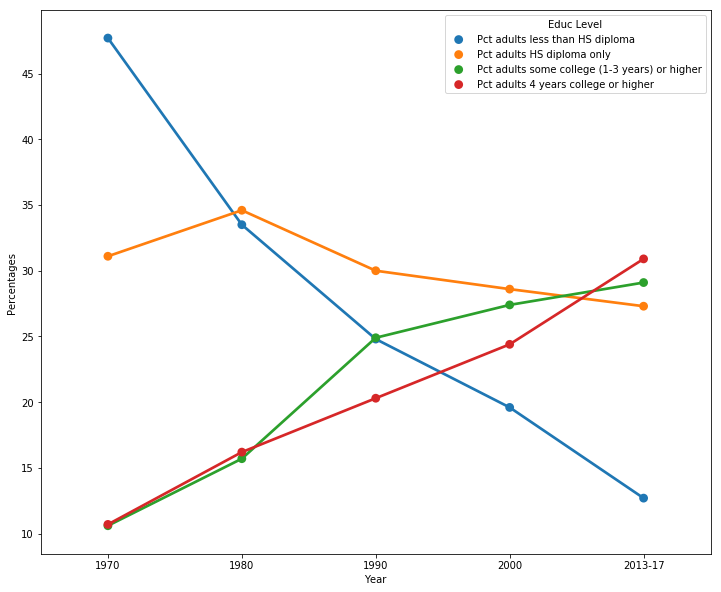

In [47]:
plt.figure(figsize=(12,10))
sns.pointplot(x='Year',y='Percentages',hue='Educ Level',data=US_only); #creates a linechart to see overall trend

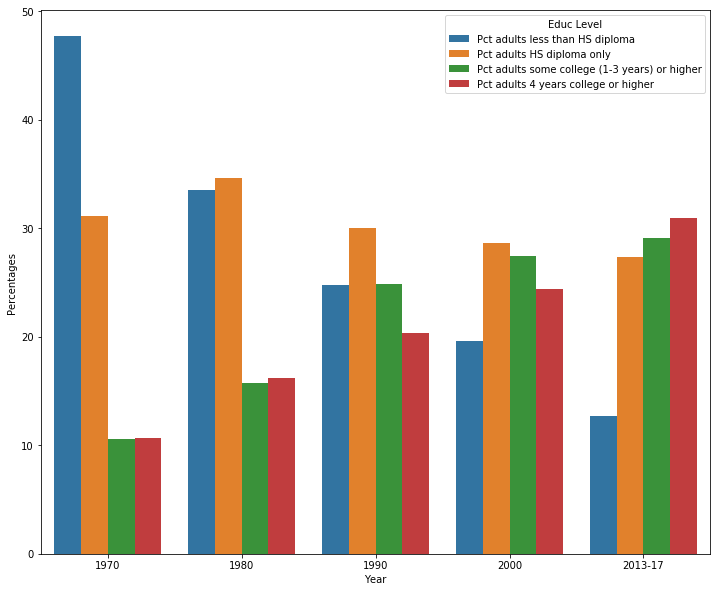

In [48]:
plt.figure(figsize=(12,10))
sns.barplot(x='Year',y='Percentages',hue='Educ Level',data=US_only); #also created a barchart to supplement and see overall trend

**Analysis/Insights:**
1. The percentage of adults in the US with less than high school diploma continued to decrease across all the years.
2. Except for the year 1980, the percentage of adults with high school diploma also decreased overall.
3. The percentage of adults who had some college and associate's degree and also the percentage of adults who completed 4 years of college or bachelor's degree and higher also increased across all years.

It seems that more and more adults in the US are now completing or getting a bachelor's degree or even higher since the percentage of adults kept on increasing across the years (from 1970-present).

**Question 2: Which state has the greatest percentage of adults who have a bachelor's degree or higher for the years 2013-2017?**
To be able to answer this question, the following steps were undertaken:
1. Create a dataframe that will only contain state level data. 
2. Divide original long formatted dataset into two such that one dataframe will only have FIPS Code with string length less than or equal to 4 and another one with length greater than 4. Looking at the FIPS Code, the state level data has FIPS Code with a pattern wherein it ends with 3 or more zero. Example: 1000, 10000, 51000, etc. are state level data.
3. Using a regex pattern, extract the state level data from each dataframe.
4. Merge the two dataset into one dataframe.
5. Filter above dataframe to only contain states with percentage of adults who have bachelor's degree or higher and the year 2013-2017.
6. Get maximum values.

In [49]:
#create 2 dataframes where FIPS Code character length = 0-4 only and FIPS Code character length = 5
educ_FIPS1 = l_educ_df[l_educ_df['FIPS Code'].str.len() <= 4] #dataframe with FIPS Code character length <= 4
educ_FIPS1.head()

,FIPS Code,State,Area name,Year,Educ Level,Percentages
0,0,US,United States,1970,Pct adults less than HS diploma,47.7
1,1000,AL,Alabama,1970,Pct adults less than HS diploma,58.7
2,1001,AL,Autauga County,1970,Pct adults less than HS diploma,54.8
3,1003,AL,Baldwin County,1970,Pct adults less than HS diploma,59.4
4,1005,AL,Barbour County,1970,Pct adults less than HS diploma,68.8


In [50]:
#create data frame with FIPS Code character length = 5
educ_FIPS2= l_educ_df[l_educ_df['FIPS Code'].str.len() > 4]
educ_FIPS2.head()

,FIPS Code,State,Area name,Year,Educ Level,Percentages
331,10000,DE,Delaware,1970,Pct adults less than HS diploma,45.4
332,10001,DE,Kent County,1970,Pct adults less than HS diploma,47.7
333,10003,DE,New Castle County,1970,Pct adults less than HS diploma,42.4
334,10005,DE,Sussex County,1970,Pct adults less than HS diploma,57.0
335,11000,DC,District of Columbia,1970,Pct adults less than HS diploma,44.8


In [51]:
#extract state level data from first dataframe
pattern1 = '[0-9](0){3}'
US_states1 = educ_FIPS1[educ_FIPS1['FIPS Code'].str.contains(pattern1)]
US_states1.head()

C:\Users\mhari\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,FIPS Code,State,Area name,Year,Educ Level,Percentages
1,1000,AL,Alabama,1970,Pct adults less than HS diploma,58.7
69,2000,AK,Alaska,1970,Pct adults less than HS diploma,33.3
106,4000,AZ,Arizona,1970,Pct adults less than HS diploma,41.9
122,5000,AR,Arkansas,1970,Pct adults less than HS diploma,60.1
198,6000,CA,California,1970,Pct adults less than HS diploma,37.4


In [52]:
#extract state level data from second dataframe
pattern2 = '[0-9]{2}(0){3}'
US_states2 = educ_FIPS2[educ_FIPS2['FIPS Code'].str.contains(pattern2)]
US_states2.head()

C:\Users\mhari\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,FIPS Code,State,Area name,Year,Educ Level,Percentages
331,10000,DE,Delaware,1970,Pct adults less than HS diploma,45.4
335,11000,DC,District of Columbia,1970,Pct adults less than HS diploma,44.8
337,12000,FL,Florida,1970,Pct adults less than HS diploma,47.4
405,13000,GA,Georgia,1970,Pct adults less than HS diploma,59.4
565,15000,HI,Hawaii,1970,Pct adults less than HS diploma,38.1


In [53]:
#merge dataframe to one to have one dataframe for all state level data
states_only = pd.concat([US_states1, US_states2])
states_only.head()

,FIPS Code,State,Area name,Year,Educ Level,Percentages
1,1000,AL,Alabama,1970,Pct adults less than HS diploma,58.7
69,2000,AK,Alaska,1970,Pct adults less than HS diploma,33.3
106,4000,AZ,Arizona,1970,Pct adults less than HS diploma,41.9
122,5000,AR,Arkansas,1970,Pct adults less than HS diploma,60.1
198,6000,CA,California,1970,Pct adults less than HS diploma,37.4


In [54]:
#filter dataframe to extract state level data for Year 2013-2017 and only for rows having 4 years of college or higher
bs2013_states_only = states_only[(states_only['Year']=='2013-17') & (states_only['Educ Level']=='Pct adults 4 years college or higher')]
bs2013_states_only.head()

,FIPS Code,State,Area name,Year,Educ Level,Percentages
62378,1000,AL,Alabama,2013-17,Pct adults 4 years college or higher,24.5
62446,2000,AK,Alaska,2013-17,Pct adults 4 years college or higher,29.0
62483,4000,AZ,Arizona,2013-17,Pct adults 4 years college or higher,28.4
62499,5000,AR,Arkansas,2013-17,Pct adults 4 years college or higher,22.0
62575,6000,CA,California,2013-17,Pct adults 4 years college or higher,32.6


In [55]:
#prints state name and percentage value of the state with highest percentage for adults who have attained 4 years of college or higher for year 2013-2017
print(bs2013_states_only.max()['Area name'])
print(bs2013_states_only.max()['Percentages'])

Wyoming
56.6


**Analysis:** Results show that Wyoming has the highest percentage of adults attaining 4 years of college or higher for the year 2013 - 2017 at 56.6%.

**Question 3: 3. Once you have found the state, which county in that state has the greatest percentage of adults who have a bachelor's degree or higher for the years 2013-2017?**
To be able to answer this question, the following steps were undertaken:
1. Merge the dataframes that have the US level data only and the 2 dataframes having state level data.
2. County level data are those not contained into the merged dataframe in step 1.
3. Filter above dataframe to only contain data from Wyoming which was the result in question 2 and counties belonging in this state with percentage of adults who have bachelor's degree or higher and the year 2013-2017.
4. Get maximum values.

In [56]:
#merge US data and state level data in one dataframe
US_states_all = pd.concat([US_only, US_states1, US_states2])
US_states_all.head()

,FIPS Code,State,Area name,Year,Educ Level,Percentages
0,0,US,United States,1970,Pct adults less than HS diploma,47.7
3283,0,US,United States,1970,Pct adults HS diploma only,31.1
6566,0,US,United States,1970,Pct adults some college (1-3 years) or higher,10.6
9849,0,US,United States,1970,Pct adults 4 years college or higher,10.7
13132,0,US,United States,1980,Pct adults less than HS diploma,33.5


In [57]:
#extract county level data using the merged dataframe
county_only = l_educ_df[~l_educ_df.index.isin(US_states_all.index)]
county_only.head()

,FIPS Code,State,Area name,Year,Educ Level,Percentages
2,1001,AL,Autauga County,1970,Pct adults less than HS diploma,54.8
3,1003,AL,Baldwin County,1970,Pct adults less than HS diploma,59.4
4,1005,AL,Barbour County,1970,Pct adults less than HS diploma,68.8
5,1007,AL,Bibb County,1970,Pct adults less than HS diploma,73.1
6,1009,AL,Blount County,1970,Pct adults less than HS diploma,70.5


In [58]:
#filter to only get data from state of Wyoming and with level of education 4 years of college or higher and for the year 2013-2017
bs2013_WY_only = county_only[(county_only['State']=='WY') & (county_only['Year']=='2013-17') & (county_only['Educ Level']=='Pct adults 4 years college or higher')]
bs2013_WY_only.head()

,FIPS Code,State,Area name,Year,Educ Level,Percentages
65558,56001,WY,Albany County,2013-17,Pct adults 4 years college or higher,49.8
65559,56003,WY,Big Horn County,2013-17,Pct adults 4 years college or higher,19.2
65560,56005,WY,Campbell County,2013-17,Pct adults 4 years college or higher,18.5
65561,56007,WY,Carbon County,2013-17,Pct adults 4 years college or higher,20.9
65562,56009,WY,Converse County,2013-17,Pct adults 4 years college or higher,18.2


In [60]:
#print county name and percentage with highest percentage of adults having attained 4 years of college or higher for year 2013-2017 in Wyoming
print(bs2013_WY_only.max()['Area name'])
print(bs2013_WY_only.max()['Percentages'])

Weston County
54.1


**Analysis:** Results show that Weston County in Wyoming has the highest percentage of adults attaining 4 years of college or higher for the year 2013 - 2017 at 54.1%.